
#### Architecture - Semantic Search using Elastic Search

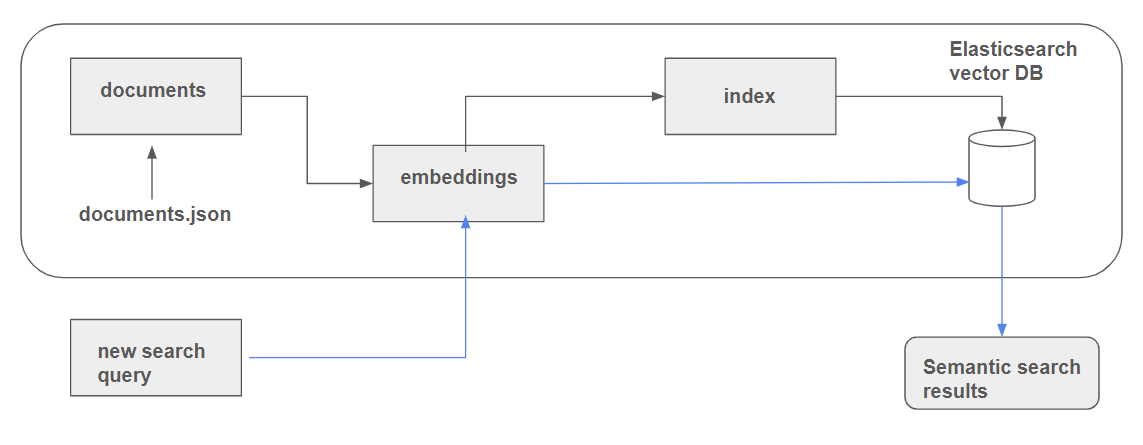

* Two very important concepts in Elasticsearch are documents and indexes.
* A document is collection of fields with their associated values.
* To work with Elasticsearch you have to organize your data into documents, and then add all your documents to an index.
* Index as a collection of documents that is stored in a highly optimized format designed to perform efficient searches.



#### Step 1: Prepare documents

In [6]:
!wget 'https://github.com/DataTalksClub/llm-zoomcamp/blob/main/01-intro/documents.json?raw=1'

--2024-07-09 19:00:09--  https://github.com/DataTalksClub/llm-zoomcamp/blob/main/01-intro/documents.json?raw=1
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/DataTalksClub/llm-zoomcamp/raw/main/01-intro/documents.json [following]
--2024-07-09 19:00:09--  https://github.com/DataTalksClub/llm-zoomcamp/raw/main/01-intro/documents.json
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DataTalksClub/llm-zoomcamp/main/01-intro/documents.json [following]
--2024-07-09 19:00:09--  https://raw.githubusercontent.com/DataTalksClub/llm-zoomcamp/main/01-intro/documents.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|

In [4]:
!pwd

/workspaces/llm-zoomcamp/03-vector-search


In [7]:
import json

with open('documents.json', 'rt') as f_in:
    docs_raw = json.load(f_in)

In [8]:
documents = []

for course_dict in docs_raw:
    for doc in course_dict['documents']:
        doc['course'] = course_dict['course']
        documents.append(doc)

documents[1]

{'text': 'GitHub - DataTalksClub data-engineering-zoomcamp#prerequisites',
 'section': 'General course-related questions',
 'question': 'Course - What are the prerequisites for this course?',
 'course': 'data-engineering-zoomcamp'}


#### Step 2: Create Embeddings using Pretrained Models

* Sentence Transformers documentation here: https://www.sbert.net/docs/sentence_transformer/pretrained_models.html


In [15]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 3.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 5.8 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 36.6 MB/s eta 0:00:00:00:01

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


##### This is a new library compared to the previous modules. 
* Please perform "pip install sentence_transformers==2.7.0"

    + if you get an error do the following:
    + 1. Uninstall numpy 
    + 2. Uninstall torch
    + 3. pip install numpy==1.26.4
    + 4. pip install torch
* run the above cell, it should work

In [28]:
!pip install -U sentence_transformers==2.7.0

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.0 MB/s eta 0:00:00ta 0:00:01
  Attempting uninstall: sentence_transformers
    Found existing installation: sentence-transformers 3.0.1
    Uninstalling sentence-transformers-3.0.1:
      Successfully uninstalled sentence-transformers-3.0.1

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [29]:
!pip show sentence-transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Name: sentence-transformers
Version: 2.7.0
Summary: Multilingual text embeddings
Home-page: https://www.SBERT.net
Author: Nils Reimers
Author-email: info@nils-reimers.de
License: Apache License 2.0
Location: /usr/local/python/3.10.13/lib/python3.10/site-packages
Requires: huggingface-hub, numpy, Pillow, scikit-learn, scipy, torch, tqdm, transformers
Required-by: 


In [16]:
from sentence_transformers import SentenceTransformer

In [17]:
model = SentenceTransformer("all-mpnet-base-v2")

In [30]:
model.encode("This is a simple sentence")

array([ 4.44874773e-03, -7.61314183e-02, -3.77463410e-04,  7.52523495e-03,
       -3.80979627e-02,  3.80131155e-02, -9.73007455e-03, -5.05397609e-03,
       -9.37981065e-03,  1.23887779e-02,  4.91276272e-02,  1.52209876e-02,
        3.80008817e-02, -6.41802326e-02,  9.42123588e-03, -5.19748665e-02,
        9.08066779e-02,  1.71116143e-02,  1.62125695e-02,  2.98865885e-02,
        1.50544569e-03,  8.35077930e-03,  3.78842019e-02, -1.01193096e-02,
        6.46105781e-03,  3.97246258e-05, -1.45217329e-02, -1.88468657e-02,
       -3.74039561e-02, -1.51669735e-03, -1.02679776e-02, -3.68062370e-02,
        2.36677825e-02, -6.46023378e-02,  1.96967039e-06, -5.01107937e-03,
       -2.80827843e-03, -1.92074105e-02, -8.65119621e-02,  2.83465330e-02,
       -5.38667329e-02,  3.63706239e-02, -2.26468481e-02,  2.87368018e-02,
       -1.32342773e-02,  1.08689643e-01,  3.70518453e-02,  3.38802449e-02,
       -5.30679151e-02,  3.61782387e-02, -1.35724584e-03, -3.63483243e-02,
       -2.78346147e-02, -

In [18]:
len(model.encode("This is a simple sentence"))

768

In [19]:
documents[1]

{'text': 'GitHub - DataTalksClub data-engineering-zoomcamp#prerequisites',
 'section': 'General course-related questions',
 'question': 'Course - What are the prerequisites for this course?',
 'course': 'data-engineering-zoomcamp'}

In [20]:
#created the dense vector using the pre-trained model
operations = []
for doc in documents:
    # Transforming the title into an embedding using the model
    doc["text_vector"] = model.encode(doc["text"]).tolist()
    operations.append(doc)


In [31]:
operations[1]

{'text': 'GitHub - DataTalksClub data-engineering-zoomcamp#prerequisites',
 'section': 'General course-related questions',
 'question': 'Course - What are the prerequisites for this course?',
 'course': 'data-engineering-zoomcamp',
 'text_vector': [-0.041030403226614,
  0.025834161788225174,
  -0.036801841109991074,
  -0.020898321643471718,
  -0.020596304908394814,
  0.009353742003440857,
  -0.003331671468913555,
  -0.009491903707385063,
  0.030117977410554886,
  0.01908210851252079,
  0.012690035626292229,
  -0.017078785225749016,
  -0.0016324761090800166,
  0.12997251749038696,
  0.030969230458140373,
  -0.025823738425970078,
  0.0278230682015419,
  0.025159770622849464,
  -0.0808122381567955,
  -0.0036173474509269,
  -0.008902025409042835,
  0.003404824063181877,
  -0.0230092890560627,
  -0.03404529020190239,
  0.024598615244030952,
  0.013545555993914604,
  -0.025439025834202766,
  0.011951087042689323,
  -0.020540112629532814,
  -0.010077380575239658,
  0.020575348287820816,
  0.0


#### Step 3: Setup ElasticSearch connection

In [22]:
!pip install -U elasticsearch

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.2/480.2 kB 9.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 1.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
!docker run -it --rm \
    --name elasticsearch \
    -p 9200:9200 \
    -p 9300:9300 \
    -e "discovery.type=single-node" \
    -e "xpack.security.enabled=false" \
    docker.elastic.co/elasticsearch/elasticsearch:8.4.3

In [25]:
!curl http://localhost:9200

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


{
  "name" : "f3ea2bf53df4",
  "cluster_name" : "docker-cluster",
  "cluster_uuid" : "xc7FT_AHTmS3u9hzQ2a-tw",
  "version" : {
    "number" : "8.4.3",
    "build_flavor" : "default",
    "build_type" : "docker",
    "build_hash" : "42f05b9372a9a4a470db3b52817899b99a76ee73",
    "build_date" : "2022-10-04T07:17:24.662462378Z",
    "build_snapshot" : false,
    "lucene_version" : "9.3.0",
    "minimum_wire_compatibility_version" : "7.17.0",
    "minimum_index_compatibility_version" : "7.0.0"
  },
  "tagline" : "You Know, for Search"
}


In [24]:
from elasticsearch import Elasticsearch
es_client = Elasticsearch('http://localhost:9200') 

es_client.info()

ObjectApiResponse({'name': 'f3ea2bf53df4', 'cluster_name': 'docker-cluster', 'cluster_uuid': 'xc7FT_AHTmS3u9hzQ2a-tw', 'version': {'number': '8.4.3', 'build_flavor': 'default', 'build_type': 'docker', 'build_hash': '42f05b9372a9a4a470db3b52817899b99a76ee73', 'build_date': '2022-10-04T07:17:24.662462378Z', 'build_snapshot': False, 'lucene_version': '9.3.0', 'minimum_wire_compatibility_version': '7.17.0', 'minimum_index_compatibility_version': '7.0.0'}, 'tagline': 'You Know, for Search'})


#### Step 4: Create Mappings and Index

* Mapping is the process of defining how a document, and the fields it contains, are stored and indexed.
* Each document is a collection of fields, which each have their own data type.
* We can compare mapping to a database schema in how it describes the fields and properties that documents hold, the datatype of each field (e.g., string, integer, or date), and how those fields should be indexed and stored



In [26]:
index_settings = {
    "settings": {
        "number_of_shards": 1,
        "number_of_replicas": 0
    },
    "mappings": {
        "properties": {
            "text": {"type": "text"},
            "section": {"type": "text"},
            "question": {"type": "text"},
            "course": {"type": "keyword"} ,
            "text_vector": {"type": "dense_vector", "dims": 768, "index": True, "similarity": "cosine"},
        }
    }
}

In [32]:
index_name = "course-questions"

es_client.indices.delete(index=index_name, ignore_unavailable=True)
es_client.indices.create(index=index_name, body=index_settings)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'course-questions'})


#### Step 5: Add documents into index

In [33]:
for doc in operations:
    try:
        es_client.index(index=index_name, document=doc)
    except Exception as e:
        print(e)

#### Step 6: Create end user query

In [34]:
search_term = "windows or mac?"
vector_search_term = model.encode(search_term)

In [35]:
query = {
    "field": "text_vector",
    "query_vector": vector_search_term,
    "k": 5,
    "num_candidates": 10000, 
}

In [36]:
res = es_client.search(index=index_name, knn=query, source=["text", "section", "question", "course"])
res["hits"]["hits"]

[{'_index': 'course-questions',
  '_id': 'YVQMmZABFXTOshwHyeu9',
  '_score': 0.7147919,
  '_source': {'question': 'Environment - Is the course [Windows/mac/Linux/...] friendly?',
   'course': 'data-engineering-zoomcamp',
   'section': 'General course-related questions',
   'text': 'Yes! Linux is ideal but technically it should not matter. Students last year used all 3 OSes successfully'}},
 {'_index': 'course-questions',
  '_id': 'dFQNmZABFXTOshwHKe5C',
  '_score': 0.61347336,
  '_source': {'question': 'WSL instructions',
   'course': 'mlops-zoomcamp',
   'section': 'Module 1: Introduction',
   'text': 'If you wish to use WSL on your windows machine, here are the setup instructions:\nCommand: Sudo apt install wget\nGet Anaconda download address here. wget <download address>\nTurn on Docker Desktop WFree Download | AnacondaSL2\nCommand: git clone <github repository address>\nVSCODE on WSL\nJupyter: pip3 install jupyter\nAdded by Gregory Morris (gwm1980@gmail.com)\nAll in all softwares a

#### Step 7: Perform Keyword search with Semantic Search (Hybrid/Advanced Search)

In [37]:
# Note: I made a minor modification to the query shown in the notebook here
# (compare to the one shown in the video)
# Included "knn" in the search query (to perform a semantic search) along with the filter  
knn_query = {
    "field": "text_vector",
    "query_vector": vector_search_term,
    "k": 5,
    "num_candidates": 10000
}

In [41]:
response = es_client.search(
    index=index_name,
    query={
        "match": {"section": "General course-related questions"},
    },
    knn=knn_query,
    size=5,
    explain=True
)

In [43]:
response = es_client.search(
    index=index_name,
    query={
        "match": {"course": "data-engeneering-zoomcamp"},
    },
    knn=knn_query,
    size=5,
    explain=True
)

In [44]:
response["hits"]["hits"]

[{'_shard': '[course-questions][0]',
  '_node': '4Gy_9nq6S82ziEBGMv9Bew',
  '_index': 'course-questions',
  '_id': 'YVQMmZABFXTOshwHyeu9',
  '_score': 0.7147919,
  '_source': {'text': 'Yes! Linux is ideal but technically it should not matter. Students last year used all 3 OSes successfully',
   'section': 'General course-related questions',
   'question': 'Environment - Is the course [Windows/mac/Linux/...] friendly?',
   'course': 'data-engineering-zoomcamp',
   'text_vector': [-0.026965461671352386,
    -0.000626126304268837,
    -0.01662949100136757,
    0.05285150930285454,
    0.05476527288556099,
    -0.03133990615606308,
    0.029942581430077553,
    -0.04808562621474266,
    0.04467551037669182,
    0.005839474033564329,
    0.016233040019869804,
    0.012001154012978077,
    -0.031222281977534294,
    0.016600528731942177,
    -0.04886901378631592,
    -0.06496307998895645,
    0.046434223651885986,
    -0.009297756478190422,
    -0.0642528235912323,
    -0.01373267825692892,



#### References

* https://logz.io/blog/elasticsearch-mapping/#:~:text=Within%20a%20search%20engine%2C%20mapping,indexes%20and%20stores%20its%20fields

* https://www.sbert.net/docs/sentence_transformer/pretrained_models.html

* https://www.elastic.co/search-labs/tutorials

* https://www.elastic.co/search-labs/blog/text-similarity-search-with-vectors-in-elasticsearch

